# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

       Cars4U faces the challenge of accurately pricing used cars in the rapidly growing Indian pre-owned car market, which has surpassed the new car market in sales.Unlike new cars with relatively stable pricing managed by OEMs, the used car market is influenced by various factors such as mileage, brand, model, and year, leading to significant uncertainties. Solving this problem is crucial for capturing market share, building consumer trust, gaining a competitive edge, optimizing profit margins, managing inventory effectively, and establishing Cars4U as a reliable and transparent platform in the competitive market.    

### **The objective:**

 - What is the intended goal?

        The intended goal for this problem is to develop a reliable and accurate pricing strategy for used cars in the Indian market. This strategy should account for various factors influencing a car's worth, such as mileage, brand, model, and year, to minimize uncertainties in pricing and supply. Achieving this goal will enable Cars4U to:

        1. Capture a larger share of the expanding pre-owned car market.
        2. Build and maintain consumer trust by ensuring fair and transparent pricing.
        3. Gain a competitive edge over other players in the market.
        4. Optimize profit margins by avoiding overpricing or underpricing.
        5. Manage inventory more effectively by ensuring timely sales without unnecessary markdowns.
        6. Establish Cars4U as a leading and trustworthy platform for buying and selling used cars in the Indian market.

### **The key questions:**

- What are the key questions that need to be answered?

       The primary objective is to develop a reliable and accurate pricing strategy for used cars in the Indian market - subsequently,  the key questions that need to be answered are:
       * What are the principal factors impacting the pricing of used cars?
       * How can we accurately quantify the impact of each factor on a car's price?
       * How can we ensure the reliability and validity of the data used in our pricing models?
       * How can we communicate and justify our pricing to consumers to build trust and transparency?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

       The <strong>principal goal is to develop an accurate and reliable pricing strategy for used cars in the Indian market using data science.</strong> This involves building predictive models that account for various factors influencing a car's value, such as mileage, brand, model, and year, to minimize pricing uncertainties and ensure fair, competitive, and transparent pricing. Achieving this goal will help Cars4U capture market share, build consumer trust, optimize profit margins, and establish itself as a leading platform in the pre-owned car market.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [210]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

### **Let us load the data**

In [211]:
original_data = pd.read_csv('./used_cars.csv')

## Data Overview

- Observations
- Sanity checks

In [212]:
original_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [213]:
print(original_data.describe)

<bound method NDFrame.describe of       S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven

In [214]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [215]:
original_data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [216]:
# Checking the number of unique values in each column
original_data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [217]:
num_cols = [
    "year",
    "kilometers_driven",
    "mileage",
    "engine",
    "power",
    "new_price",
    "price",
]
cat_cols = ["name", "location", "fuel_type", "transmission", "owner_type", "seats"]

In [218]:

# Print summary statistics
print(original_data.describe())


             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000       7.253000e+03  7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04    18.141580  1616.573470   
std    2093.905084     3.254421       8.442772e+04     4.562197   595.285137   
min       0.000000  1996.000000       1.710000e+02     0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04    18.160000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04    21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats    New_price        Price  
count  7078.000000  7200.000000  1006.000000  6019.000000  
mean    112.765214     5.280417    22.779692     9.479468  
std      53.493553     0.809277    27.759344    11.187917  
min      34.200000     2.000000     3.9

**Observations:**
<strong>As Mentioned in the Above Cells</strong>

- There are **7253 rows and 14 columns** in the data.
- There are some columns that do not have 7253 rows, i.e., there are some **missing values** in the data.  We will need to deal with those before making our model. 

- S.No appears to be a uniqe identifier.  We will not need this for our training of a model as it will add no value.

- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.
- **Continuous columns:** Year, Kilometers_Driven, Mileage, New_Price, Engine, Power, and Price.   
- **Categorical columns:** Name,  Location, Fuel_Type, Transmission, Seats, and Owner_Type.



1. Summary Statistics:

  - The data has 7253 rows and 14 columns.
  - The columns S.No, Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, and Owner_Type have no missing values.
  - The columns Mileage, Engine, Power, Seats, New_price, and Price have missing values.
  - The column S.No is a unique identifier ranging from 0 to 7252.
  - The column Year ranges from 1996 to 2019, with a mean of 2013.
  - The column Kilometers_Driven has a mean of around 58,699 km and a maximum of 6.5 million km.
  - The column Mileage has a mean of around 18.14 km/l and a maximum of 33.54 km/l.
  - The column Engine has a mean of around 1616 cc and a maximum of 5998 cc.
  - The column Power has a mean of around 112.77 bhp and a maximum of 616 bhp.
  - The column Seats has a mean of around 5 seats and a maximum of 10 seats.
  - The column New_price has a mean of around 22.78 lakhs and a maximum of 375 lakhs.
  - The column Price has a mean of around 9.48 lakhs and a maximum of 160 lakhs.
  
2.   Number of Unique Observations:
  - There are **7253 rows and 14 columns** in the data.
  - Mileage, Engine, Power, Seats, New_price, & Price columns are missing values and will need to be addressed before building the model.

3. Remove the data where the values are un-realistic:
  - S.No Unique Identifier is not a valuable data point.  That Column will be removed.
  - Out of 7253 rows,  the New_Price column is null 6247 times.  However,  it is believed that this feature does have a critical impact on the price of the used cars.  So it is not desired to drop that feature at this time.  Instead,  we will utilize mean/median impution to fill in the missing values before building our model.


In [219]:
data = original_data.drop('S.No.', axis=1)
# Convert all Column Names to lower-case for simiplicity
data.columns = data.columns.str.lower()

# Mean imputation
# Use Mean Impution for columns with null values:
cols_with_missing_values = ["mileage", "engine", "power", "new_price", "price"]
for col in cols_with_missing_values:
    mean_val = data[col].mean()
    data[col] = data[col].fillna(mean_val)


In [220]:
# we don't want to use Mean Impution for Number of Seats because that value is not continuous...  Instead drop any rows with empty number of seats. (only affects 8 rows of our data...)
data = data.dropna(subset=["seats"])
print(data["seats"].describe())

count    7200.000000
mean        5.280417
std         0.809277
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: seats, dtype: float64


In [221]:
# Check for Extreme Values
for col in num_cols:
        # Sort the Column from largest to smallest and look for extreme values.
        print(data[col].describe())
        

count    7200.000000
mean     2013.391111
std         3.235118
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: year, dtype: float64
count    7.200000e+03
mean     5.862855e+04
std      8.468327e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.322600e+04
75%      7.300000e+04
max      6.500000e+06
Name: kilometers_driven, dtype: float64
count    7200.000000
mean       18.184255
std         4.503444
min         0.000000
25%        15.245000
50%        18.190000
75%        21.100000
max        33.540000
Name: mileage, dtype: float64
count    7200.000000
mean     1616.710972
std       595.234346
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: engine, dtype: float64
count    7200.000000
mean      112.772241
std        53.037124
min        34.200000
25%        76.800000
50%        98.600000
75%       138.030000
max       616.000000
Name: power, dtype: float6

In [222]:
# Kilometers Driven has some extreme values - potentially skewed data will need a transform...
# Mileage (which really should have been labeled Fuel Economy instead - Mileage in the U.S means the same thing as Kilometers Driven)has some invalid data labeled with Zeros...
# We will use Mean Imputation to Replace all instances of 0 Mileage with the mean...
mileage_mean = data["mileage"].replace(0, np.nan).mean()
data['mileage'] = data['mileage'].replace(0, mileage_mean)


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [223]:
# Univariate analysis of numerical columns:
distro = data[num_cols].describe().T
print(distro)

                    count          mean           std      min           25%  \
year               7200.0   2013.391111      3.235118  1996.00   2011.000000   
kilometers_driven  7200.0  58628.546111  84683.269158   171.00  34000.000000   
mileage            7200.0     18.355059      4.144229     6.40     15.400000   
engine             7200.0   1616.710972    595.234346    72.00   1198.000000   
power              7200.0    112.772241     53.037124    34.20     76.800000   
new_price          7200.0     22.779692     10.371848     3.91     22.779692   
price              7200.0      9.498817     10.208070     0.44      3.877500   

                            50%           75%         max  
year                2014.000000   2016.000000     2019.00  
kilometers_driven  53226.000000  73000.000000  6500000.00  
mileage               18.355059     21.100000       33.54  
engine              1493.000000   1968.000000     5998.00  
power                 98.600000    138.030000      616.00  

Text(0, 0.5, 'Frequency')

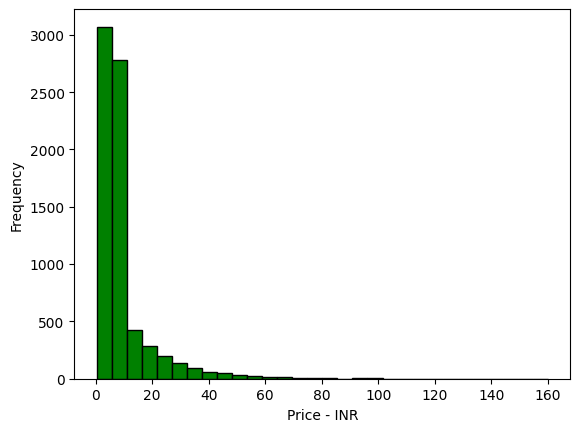

In [224]:
# Our Target Dependant Variable is "price"...
#Distribution of Price:
distrobution = data['price'].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.xlabel('Price - INR')
plt.ylabel('Frequency')

* Price Data for Set is Left Skewed

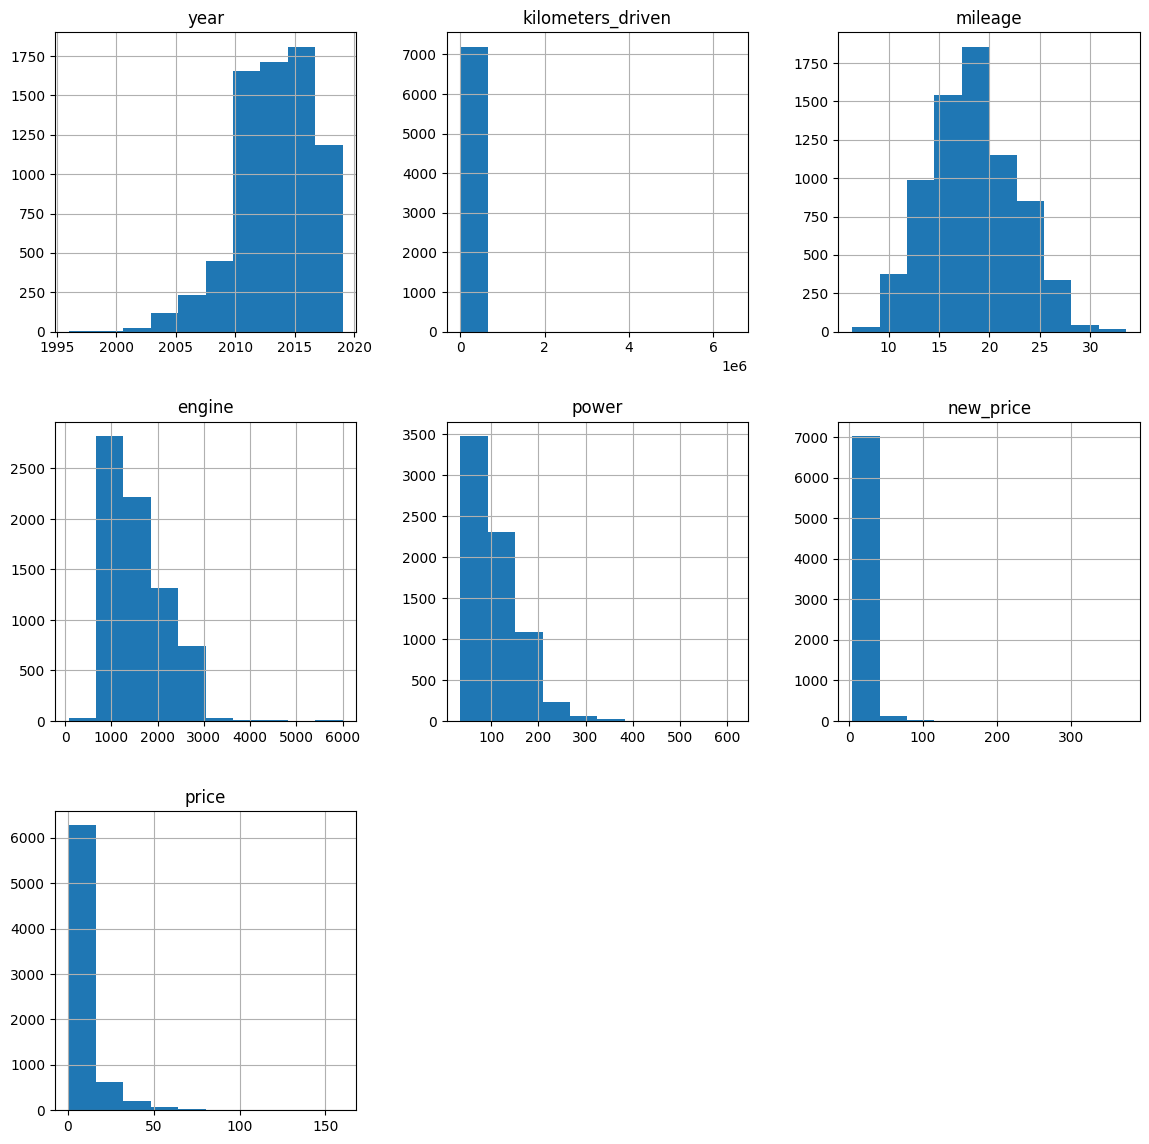

In [225]:
# Creating histograms - here we will look at the distributions for all the individual numerical columns
data[num_cols].hist(figsize = (14, 14))

plt.show()

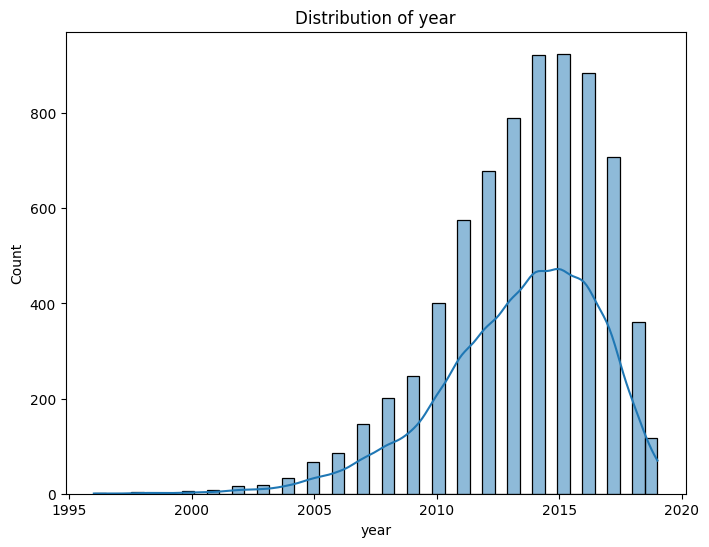

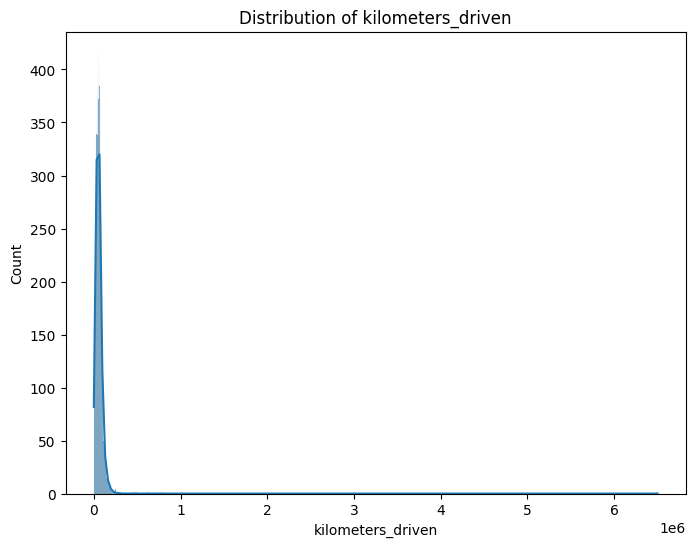

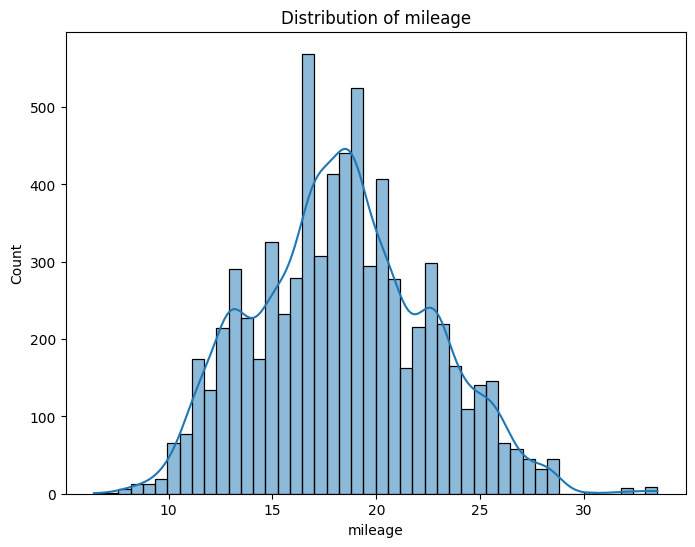

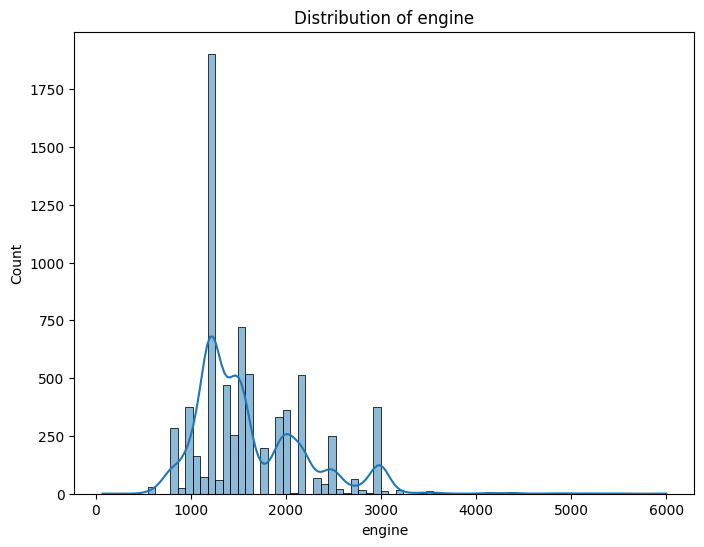

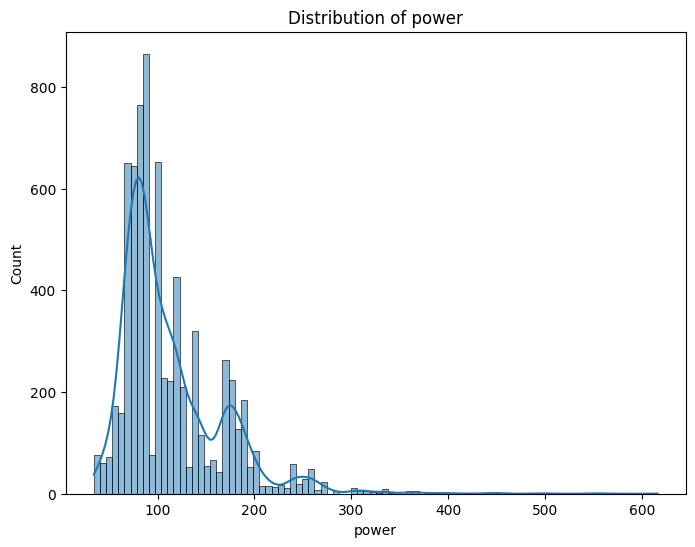

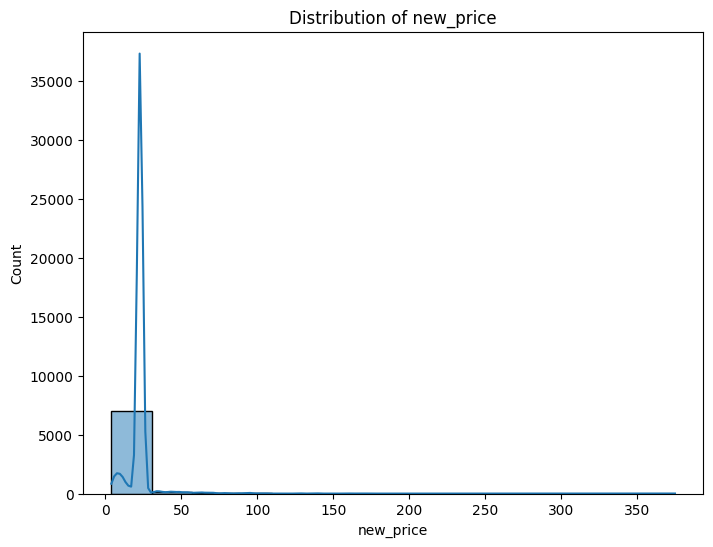

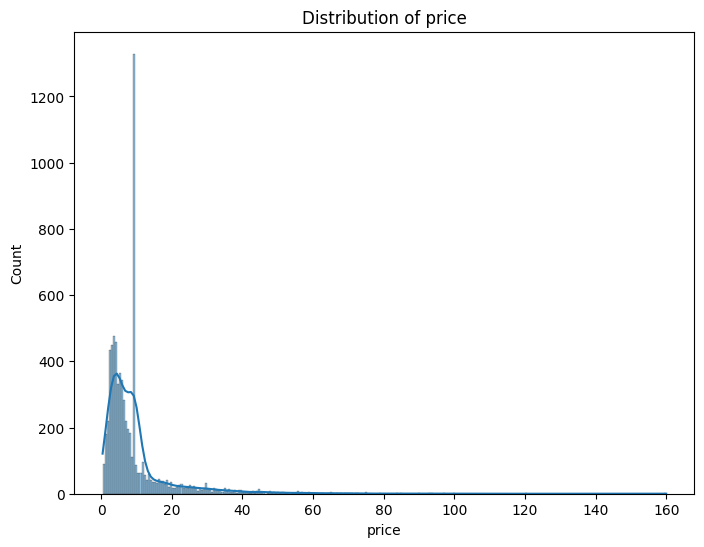

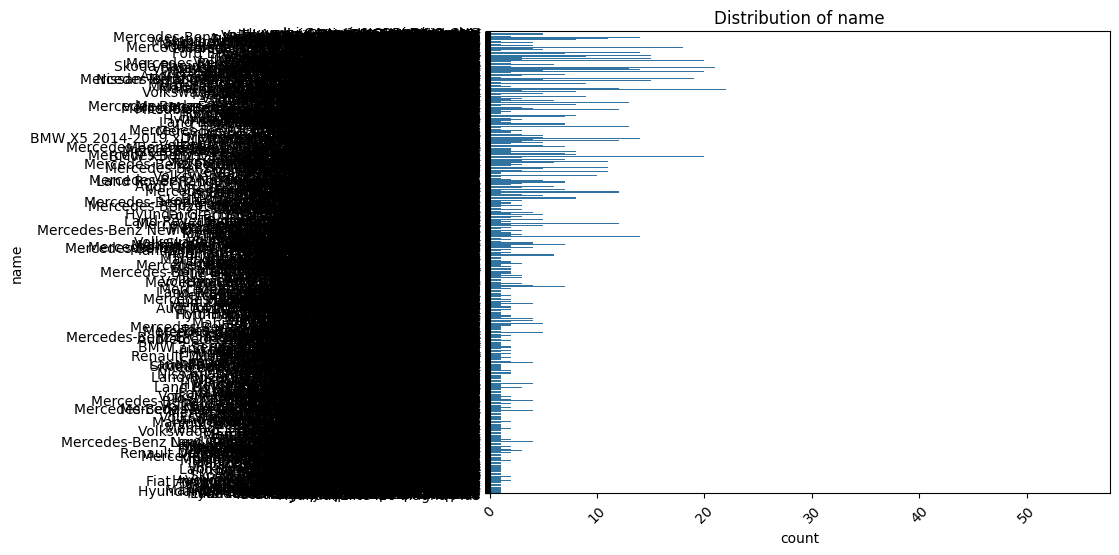

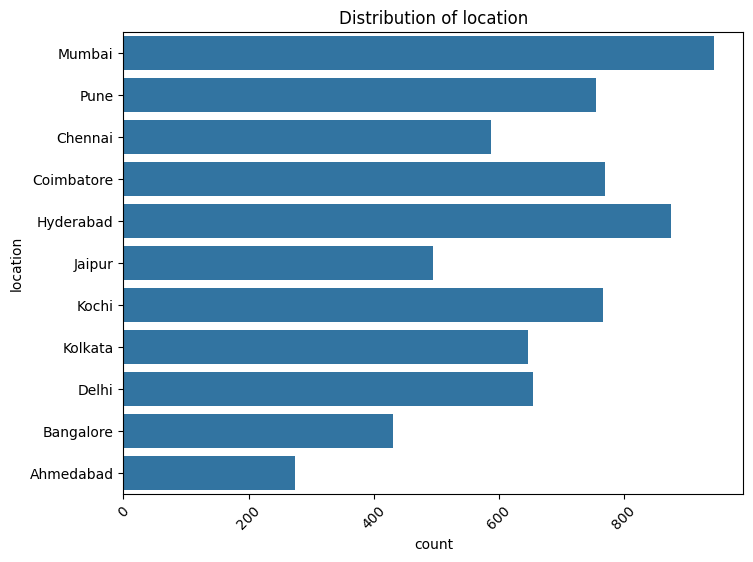

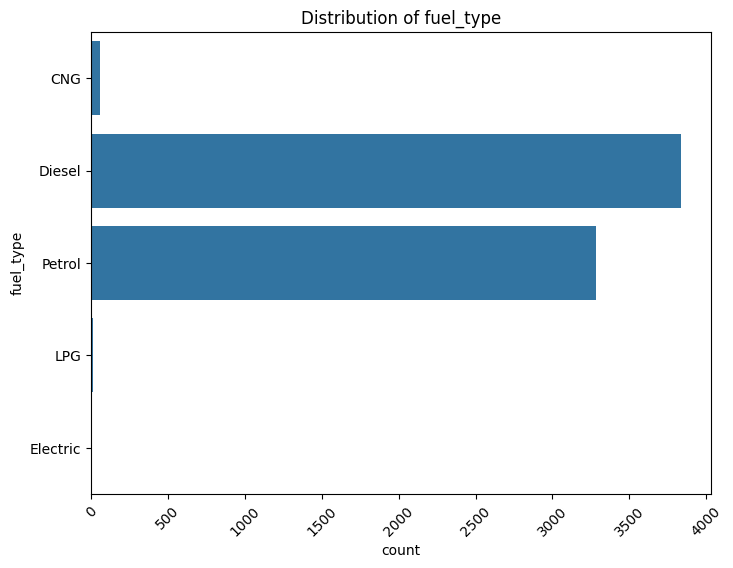

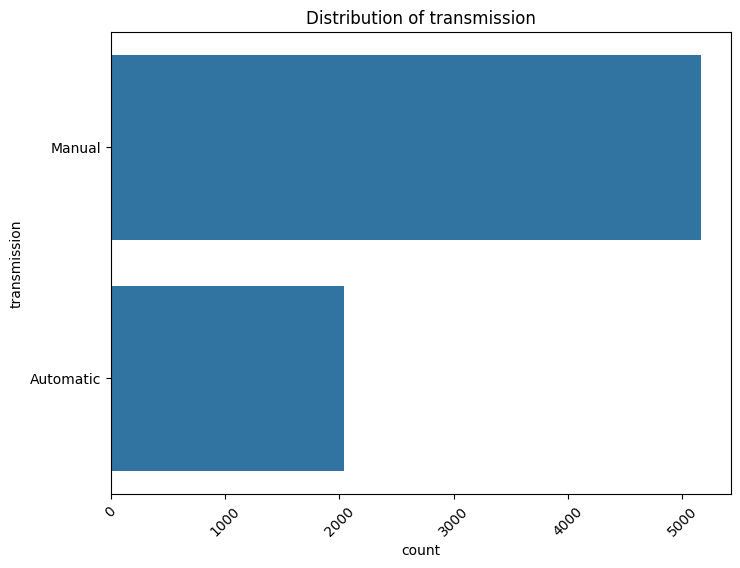

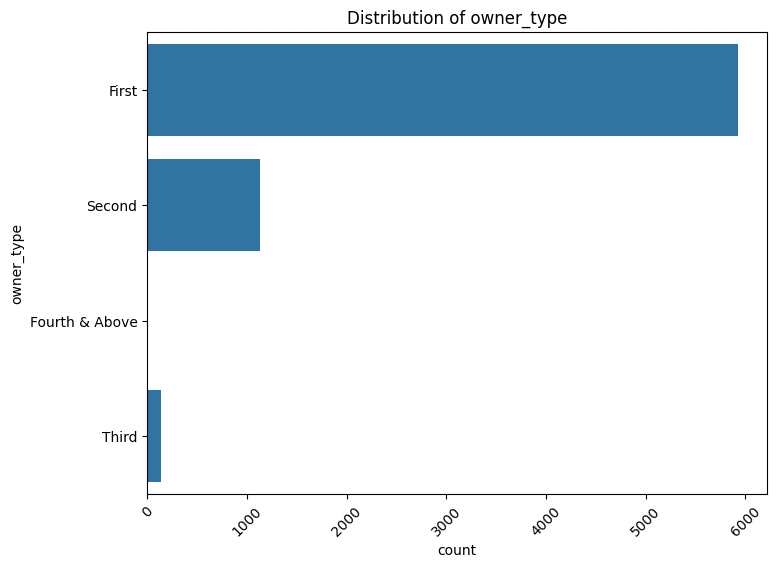

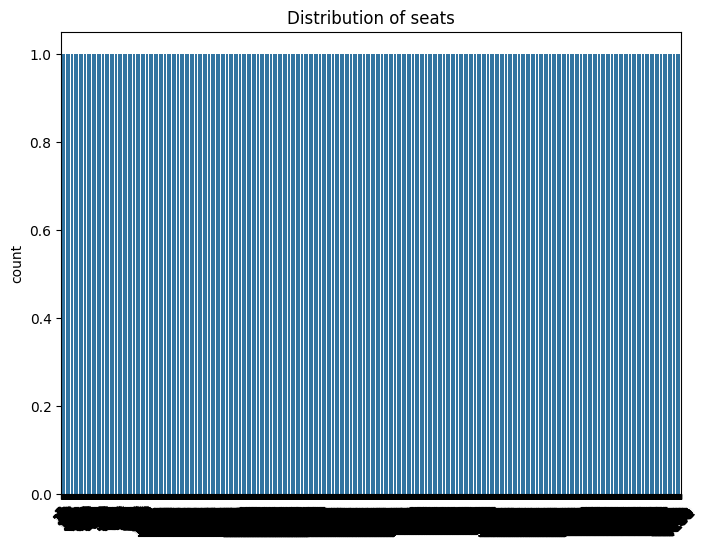

In [226]:
# Plot histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot countplots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


<Axes: xlabel='seats', ylabel='count'>

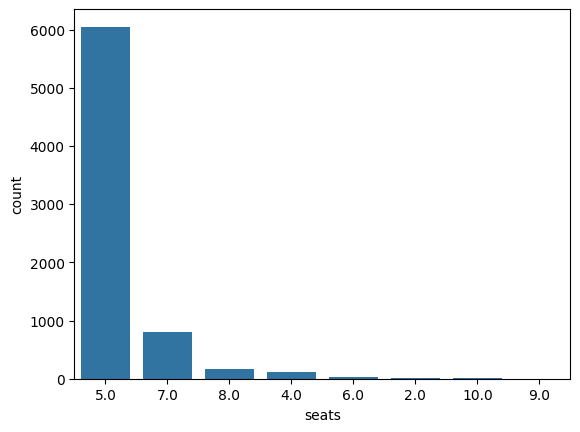

In [227]:
# The plot for Seats looks a little odd above...  So reploting here to better visualize...
sns.countplot(data, x='seats', order=data['seats'].value_counts().index)


## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

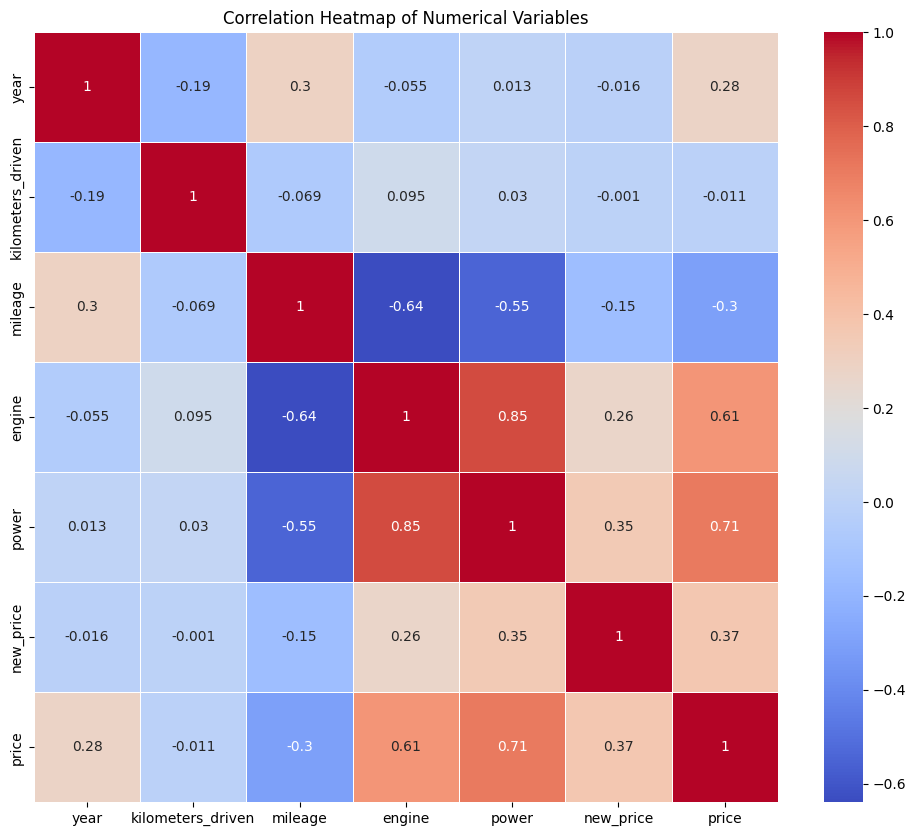

In [228]:
# Next we will create correlation heat maps for all the individual numerical variables:
plt.figure(figsize=(12, 10))
correlation_matrix = data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [229]:
print(correlation_matrix)

                       year  kilometers_driven   mileage    engine     power  \
year               1.000000          -0.187090  0.295468 -0.055114  0.013020   
kilometers_driven -0.187090           1.000000 -0.068891  0.094537  0.030076   
mileage            0.295468          -0.068891  1.000000 -0.639398 -0.545934   
engine            -0.055114           0.094537 -0.639398  1.000000  0.853516   
power              0.013020           0.030076 -0.545934  0.853516  1.000000   
new_price         -0.015889          -0.001032 -0.147763  0.264430  0.352775   
price              0.279613          -0.011105 -0.303798  0.606174  0.705635   

                   new_price     price  
year               -0.015889  0.279613  
kilometers_driven  -0.001032 -0.011105  
mileage            -0.147763 -0.303798  
engine              0.264430  0.606174  
power               0.352775  0.705635  
new_price           1.000000  0.367390  
price               0.367390  1.000000  


In [230]:
# Key observations from the correlation matrix:
# Our Dependent Variable is (car) Price (what we are trying to predict)
# 1. Correlation between dependent variable (price) and independent variables:
print("Correlation between price and other variables:")
for column in correlation_matrix.index:
    if column != 'price':
        correlation = correlation_matrix.loc['price', column]
        print(f"{column}: {correlation:.3f}")

print("\nPotential multicollinearity issues:")
for col1_idx, col1 in enumerate(correlation_matrix.columns):
    for col2 in correlation_matrix.columns[col1_idx + 1 :]:
        if correlation_matrix.loc[col1, col2] > 0.8:
            print(
                f"High correlation ({correlation_matrix.loc[col1, col2]:.2f}) between '{col1}' and '{col2}' - potential multicollinearity issue."
            )

print("\nOther statistical observations:")

highest_pos_corr_col = correlation_matrix["price"].nlargest(2).index[1]
print(
    f"Highest positive correlation with price: {correlation_matrix.loc['price', highest_pos_corr_col]:.3f} ({highest_pos_corr_col})"
)

highest_neg_corr_col = correlation_matrix["price"].nsmallest(2).index[1]
print(
    f"Highest negative correlation with price: {correlation_matrix.loc['price', highest_neg_corr_col]:.3f} ({highest_neg_corr_col})"
)

near_zero_corr_cols = correlation_matrix[
    (correlation_matrix["price"].abs() < 0.1) & (correlation_matrix.index != "price")
].index
print(
    f"Variables with near-zero correlation with price: {', '.join(near_zero_corr_cols)}"
)


Correlation between price and other variables:
year: 0.280
kilometers_driven: -0.011
mileage: -0.304
engine: 0.606
power: 0.706
new_price: 0.367

Potential multicollinearity issues:
High correlation (0.85) between 'engine' and 'power' - potential multicollinearity issue.

Other statistical observations:
Highest positive correlation with price: 0.706 (power)
Highest negative correlation with price: -0.011 (kilometers_driven)
Variables with near-zero correlation with price: kilometers_driven


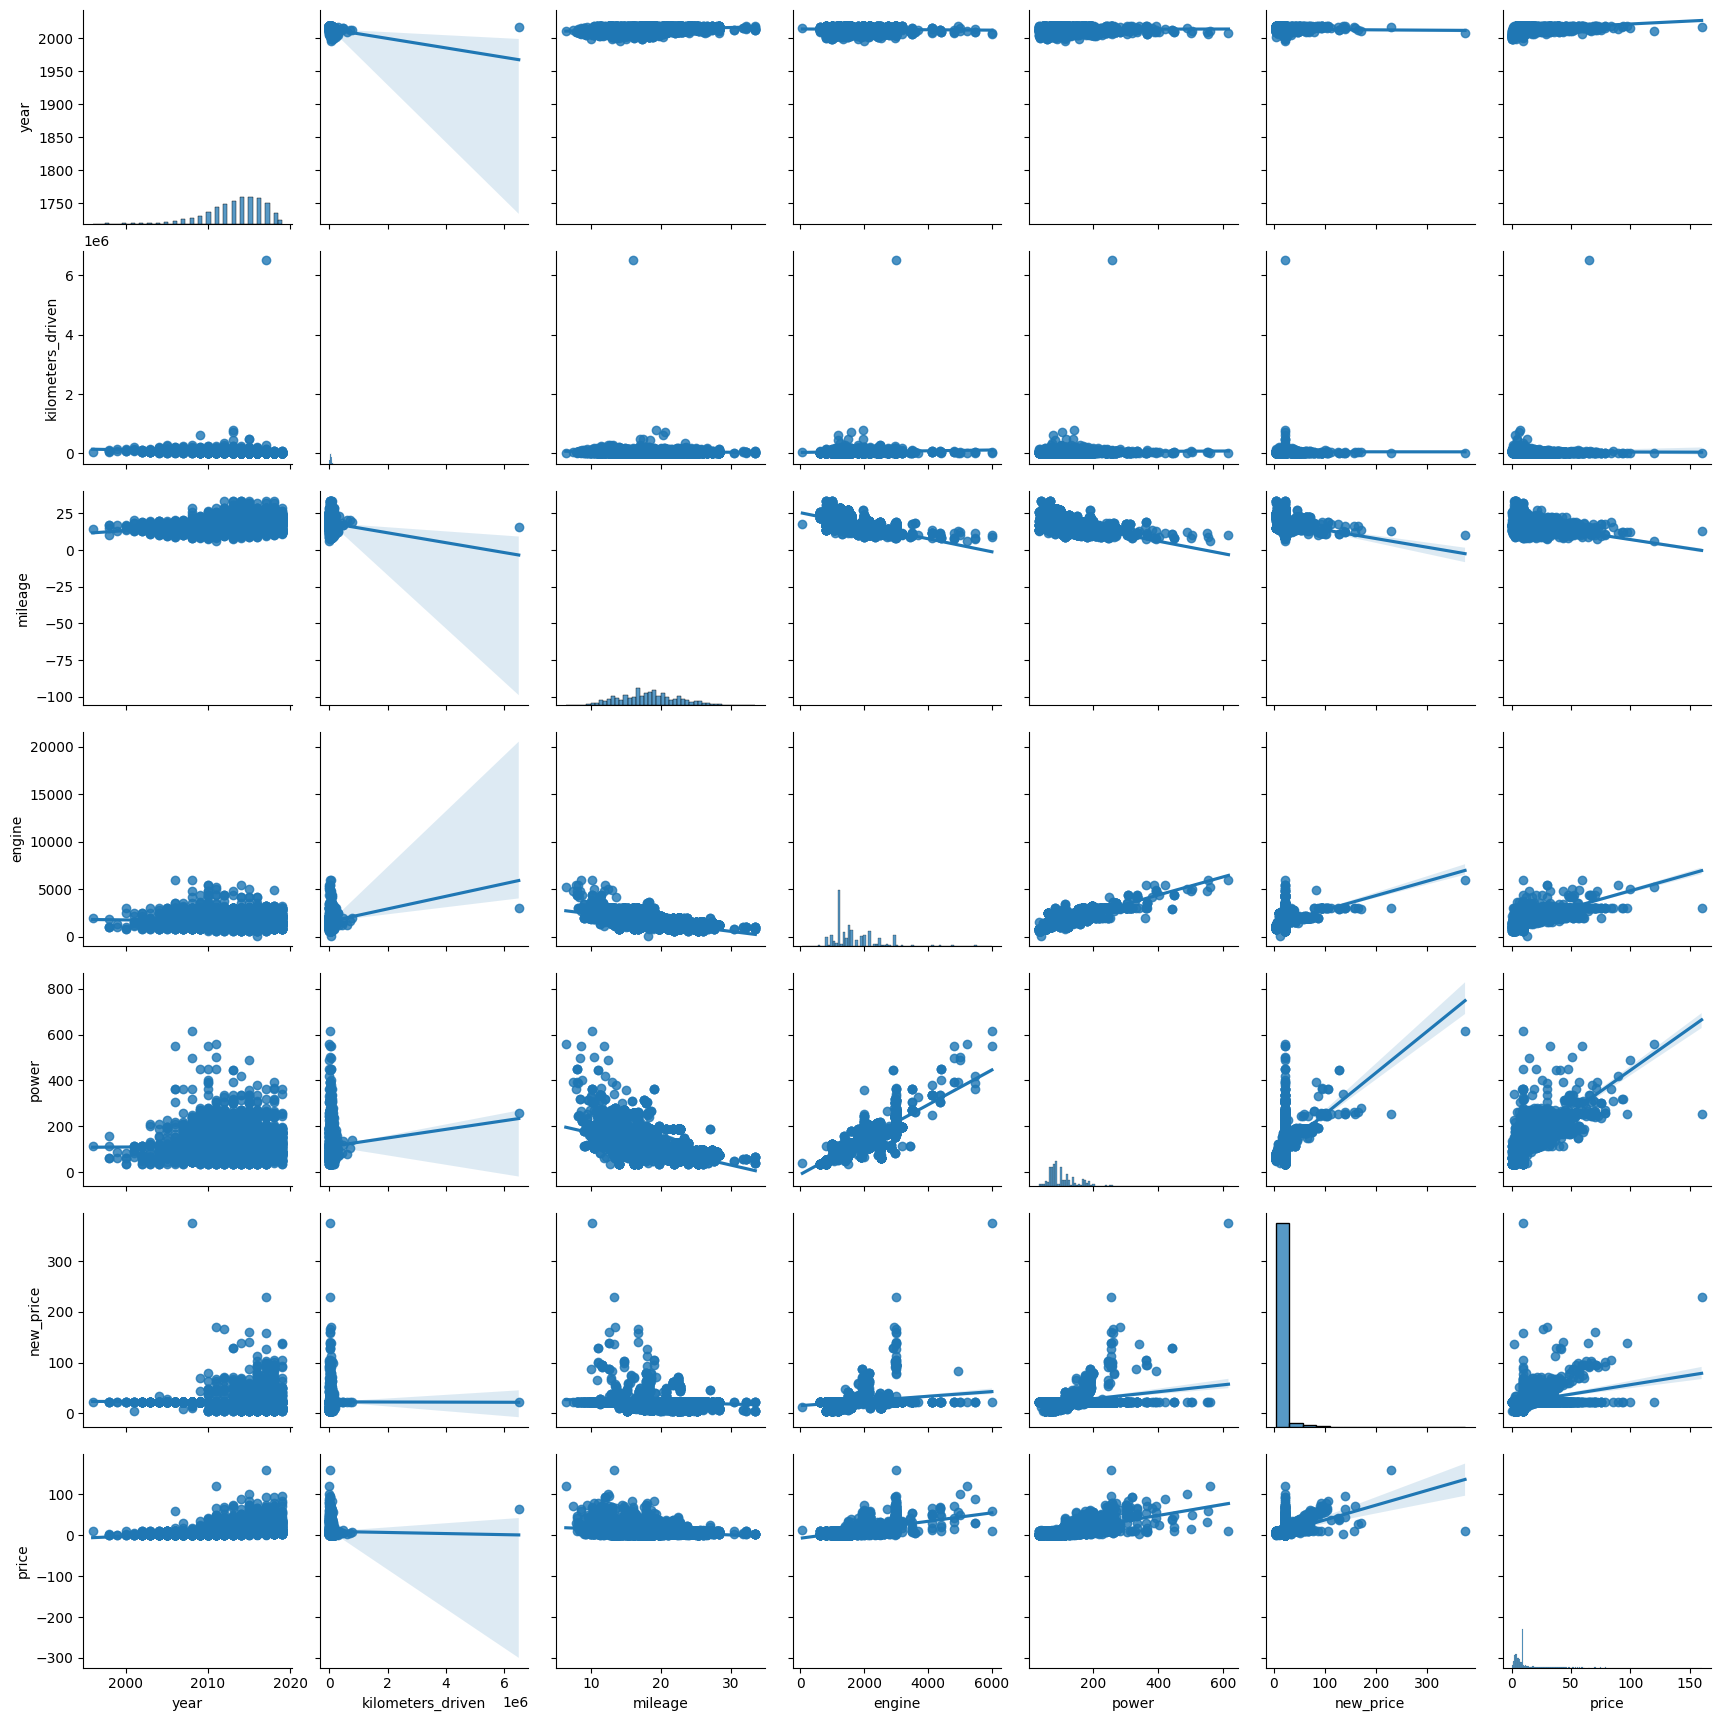

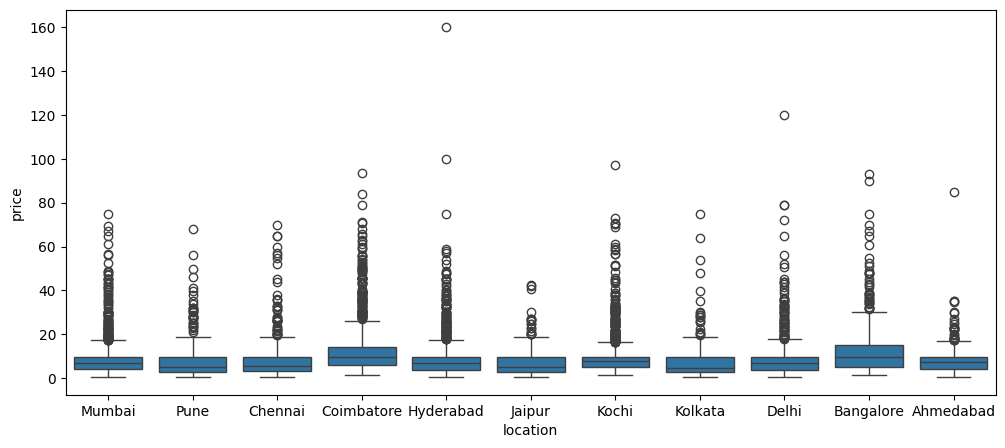

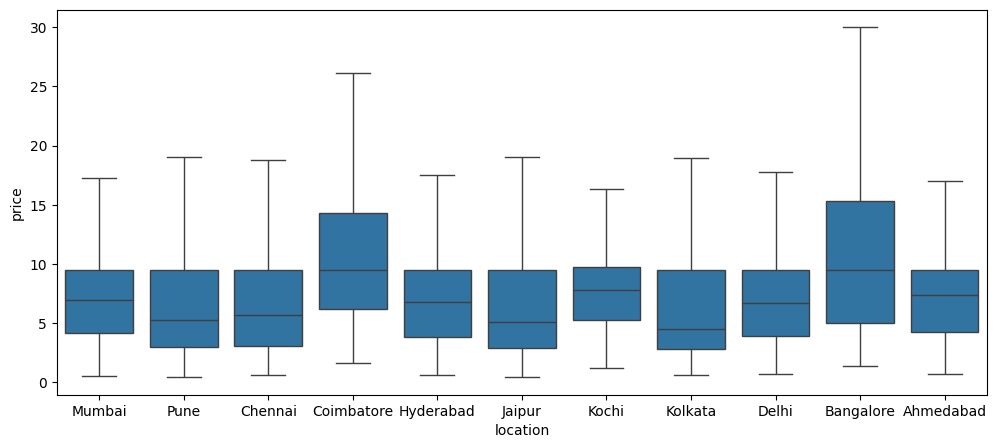

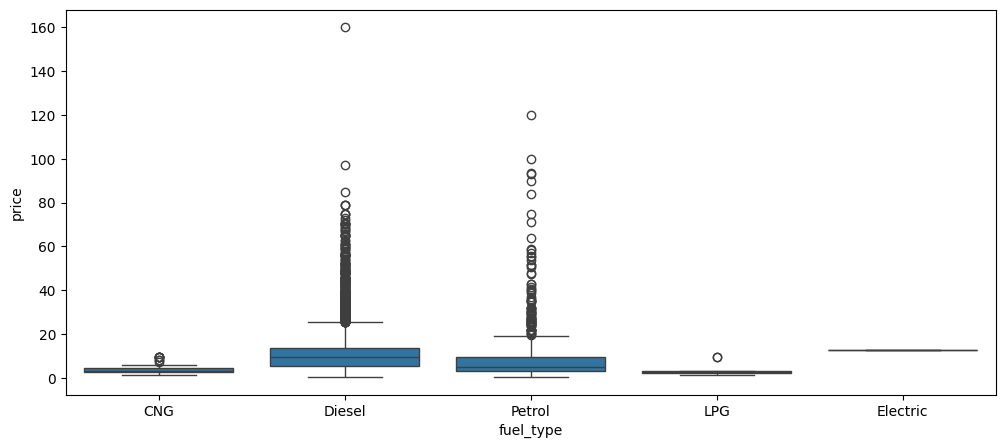

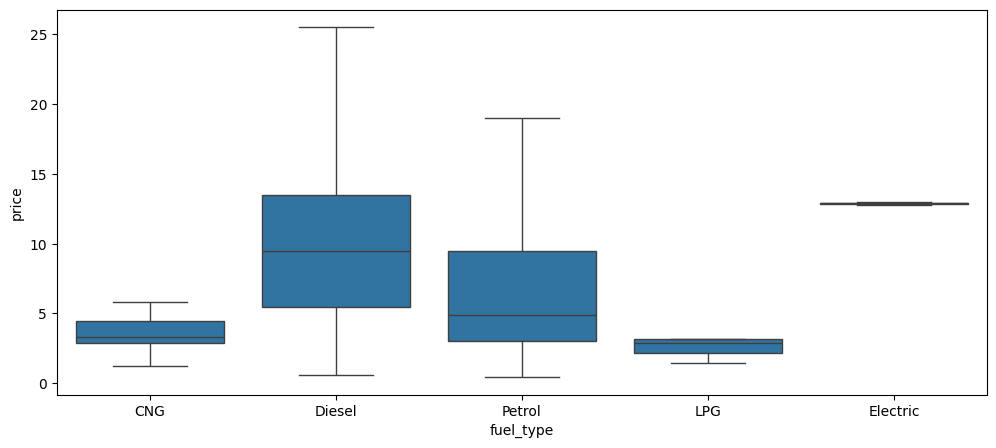

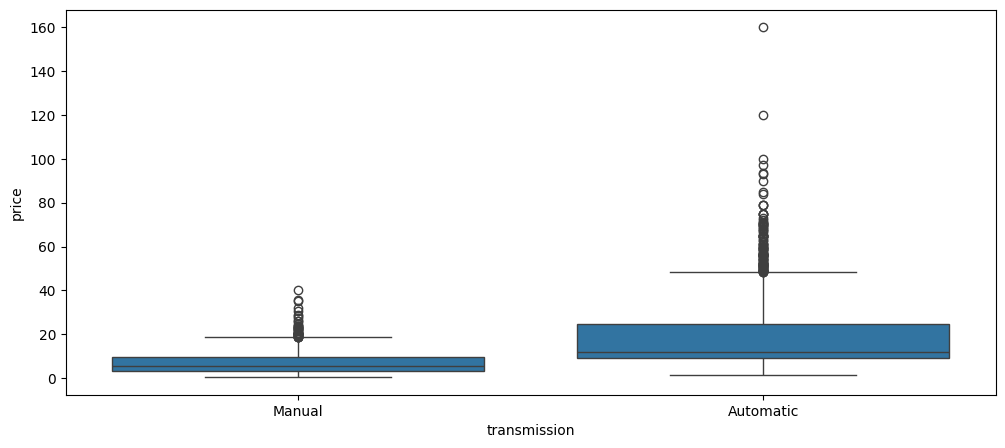

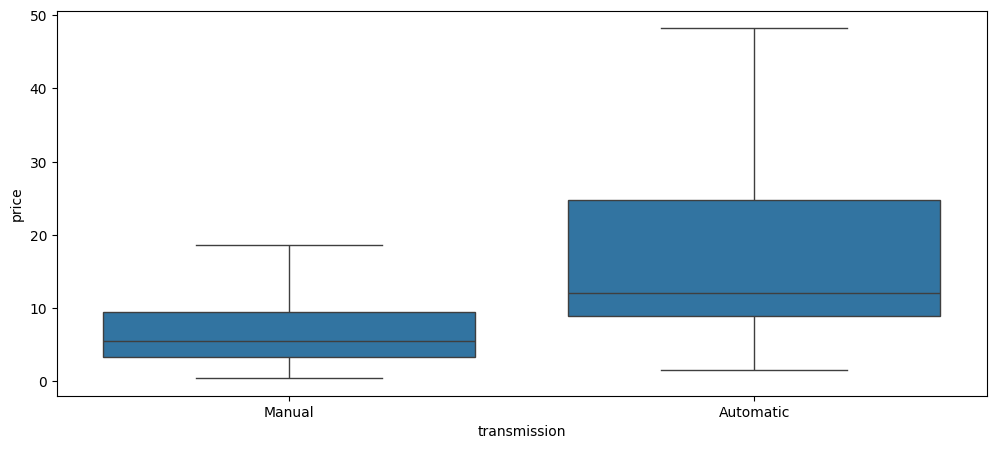

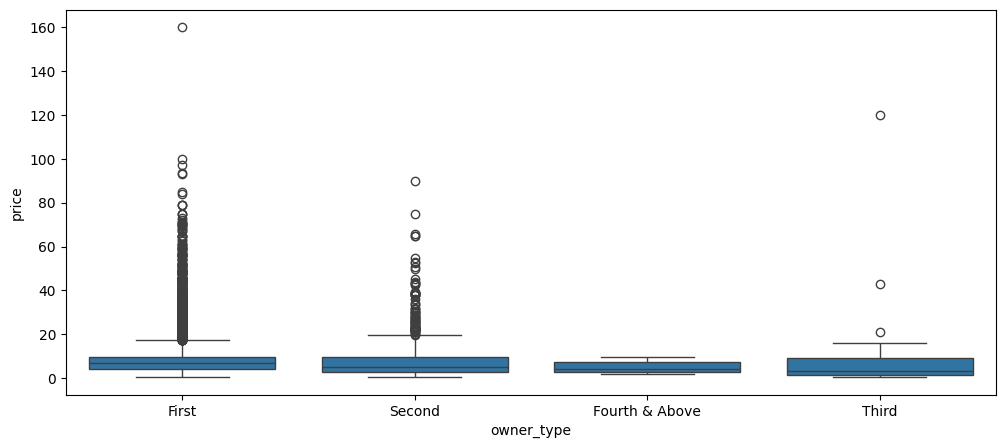

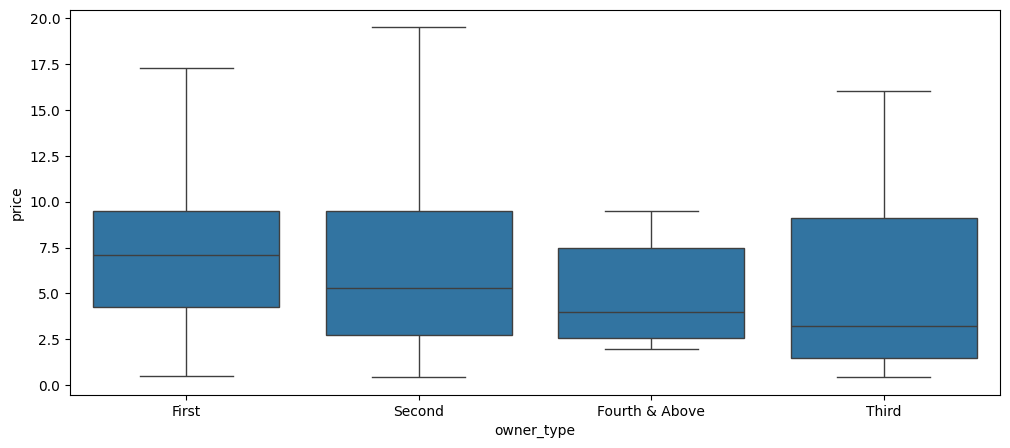

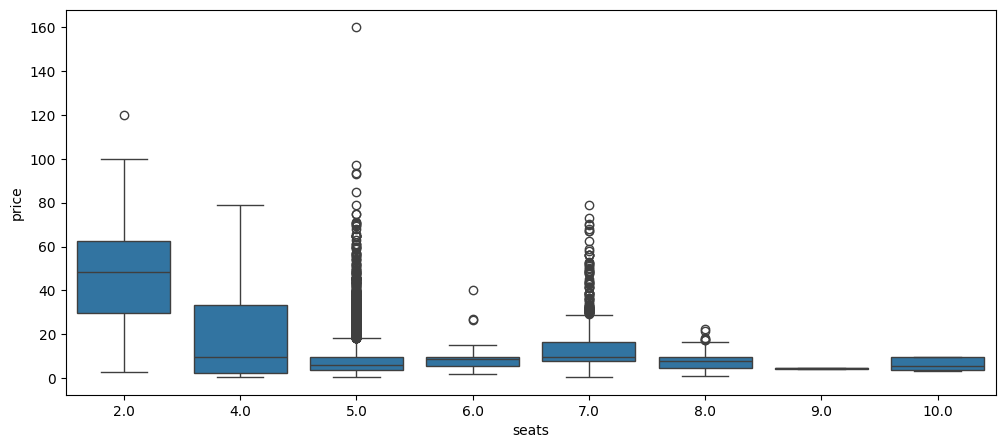

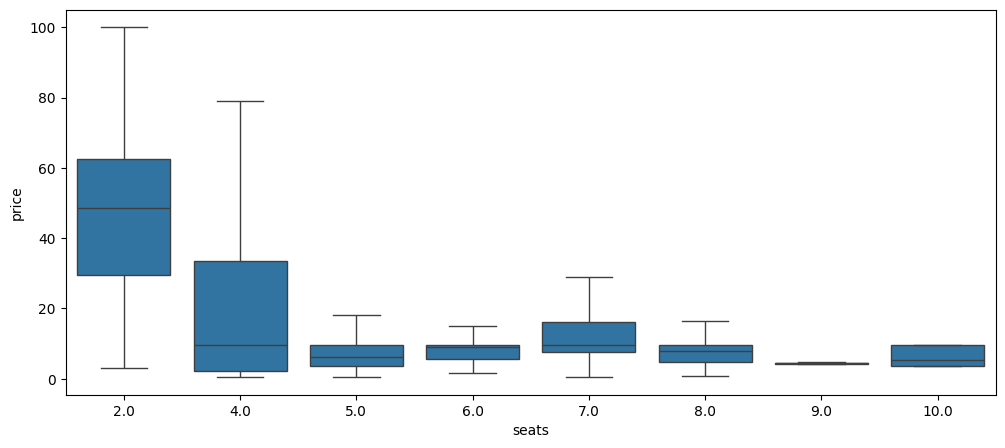

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    sns.boxplot(x = z, y = data['price']) # Defining x and y
    plt.show()
    plt.figure(figsize = (12, 5))
    sns.boxplot(x = z, y = data['price'], showfliers = False) # Turning off the outliers
    plt.show()

# Numerical vs Numerical
num_data = data[num_cols]
sns.pairplot(num_data, kind='reg')
plt.show()

for col in cat_cols:
    if col != "name":
        boxplot(data[col])



### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [232]:
# Extract Brand Names
data["brand"] = data["name"].apply(lambda x: x.split(" ")[0].lower())
cat_cols.append("brand")
cat_cols.remove("name")
data.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,22.779692,1.75,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22.779692,12.50,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610000,4.50,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,22.779692,6.00,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,22.779692,17.74,audi


In [233]:
skewed_cols = ['price', 'new_price','kilometers_driven']
for col in skewed_cols:
    data[col + '_log'] = np.log(data[col] + 1) #Add 1 to avoid taking log of 0
    num_cols.append(col + '_log')
print(num_cols)

['year', 'kilometers_driven', 'mileage', 'engine', 'power', 'new_price', 'price', 'price_log', 'new_price_log', 'kilometers_driven_log']


In [234]:
data.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand,price_log,new_price_log,kilometers_driven_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,22.779692,1.75,maruti,1.011601,3.168832,11.184435
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,22.779692,12.50,hyundai,2.602690,3.168832,10.621352
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610000,4.50,honda,1.704748,2.262804,10.736418
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,22.779692,6.00,maruti,1.945910,3.168832,11.373675
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,22.779692,17.74,audi,2.930660,3.168832,10.613271


### **Missing value treatment**

Missing Values were treated earlier in the analysis...

The following features with missing values ["mileage", "engine", "power", "new_price", "price"] were replaced using Mean imputation.

We chose NOT to use mean imputation on rows with null values for "Seats" because the number of seats is not a continuous variable (i.e.  you cannot have 3.5 seats...).   Instead, we simply dropped those rows from our dataset because it only affected 8 rows. 

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

1. Data Cleaning and Preprocessing:

* The features Mileage, Engine, Power, New_Price, Seats and Price all had null values.  Of those, the following features with missing values ["mileage", "engine", "power", "new_price", "price"] were replaced using Mean imputation. We chose NOT to use mean imputation on rows with null values for "Seats" because the number of seats is not a continuous variable (i.e.  you cannot have 3.5 seats...).   Instead, we simply dropped those rows from our dataset because it only affected 8 rows. 

* The follow features in the data were heavily skewed,  so log transformations were performed to make the data a better fit for the modeling process:
        - Price
        - New_Price
        - Kilometers_Driven
   The log-transformed columns were added as additional columns to our data set.

* The Column of Vehicle Names was too broad and not useful for modeling.  SO we developed a method to extract the Vehicle Brand Name from the Name column and added that to our dataset as a new column.


2. Exploratory Data Analysis (EDA):

It was observed that there were correlations between some of the numerical variables.  The following are the correlations between price and other variables:
year: 0.280
kilometers_driven: -0.011
mileage: -0.287
engine: 0.606
power: 0.706
new_price: 0.367

Potential multicollinearity issues:
High correlation (0.85) between 'engine' and 'power' - potential multicollinearity issue.

Other statistical observations:
Highest positive correlation with price: 0.706 (power)
Highest negative correlation with price: -0.011 (kilometers_driven)
Variables with near-zero correlation with price: 


From this data we anticipate Engine, & Power to be key features in our prediction model.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [235]:
# Encode Categorical Data
X = data.drop(["price_log", "new_price_log", "price", "kilometers_driven", "name"], axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = data[["price_log", "price"]]

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

Price & Kilometers Driven were replaced with Log Transforms in earlier cells.
Name was not a useful feature so we extracted the brand and are dropping name.
Price_log will be our independant variable so should be dropped from our training data.

In [236]:
# Split our Training and Testing Data - We will use 70% Training Data & 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape)

(5040, 56) (2160, 56)


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [237]:
# Repeatable function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable
from sklearn import metrics
def get_model_score(model, flag = True):
    # Defining an empty list to store train and test results
    score_list = []
    pred_train = model.predict(x_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(x_test)
    pred_test_ = np.exp(pred_test)
    train_r2 = metrics.r2_score(y_train['price'], pred_train_)
    test_r2 = metrics.r2_score(y_test['price'], pred_test_)
    train_rmse = metrics.mean_squared_error(y_train['price'], pred_train_, squared = False)
    test_rmse = metrics.mean_squared_error(y_test['price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train['price'], pred_train_))
        print("R-square on test set : ", metrics.r2_score(y_test['price'], pred_test_))
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['price'], pred_train_)))
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

In [238]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train['price_log'])

# Make predictions on the training set
y_pred = model.predict(x_train)

# Calculate performance metrics
LR_score = get_model_score(model)

print("####################################")
# Print model coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


print("####################################")
print("Intercept:", model.intercept_)


R-sqaure on training set :  0.7701652122889366
R-square on test set :  0.7184849993469813
RMSE on training set :  4.744010925383049
RMSE on test set :  5.782741684337984
####################################
year: 0.08535832386784177
mileage: -0.01203661543076414
engine: 0.00018132856081313348
power: 0.0031167927045274123
seats: 0.019308483487068734
new_price: 0.0018354036705456392
kilometers_driven_log: -0.04449387426568258
location_Bangalore: 0.08016683729687406
location_Chennai: 0.025338011639977454
location_Coimbatore: 0.06926268061381538
location_Delhi: -0.06968618546794836
location_Hyderabad: 0.056866454594907634
location_Jaipur: -0.04517739086578387
location_Kochi: -0.040333371907474325
location_Kolkata: -0.16517574154617404
location_Mumbai: -0.02952738415776429
location_Pune: -0.01376917443265735
fuel_type_Diesel: 0.2293658990873088
fuel_type_Electric: 0.9940235439177824
fuel_type_LPG: 0.2056753335583748
fuel_type_Petrol: 0.04961865400072171
transmission_Manual: -0.0791059287083

In [239]:
x_train1 = x_train.astype(float)
y_train1 = y_train.astype(float)

# Import Statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train2 = sm.add_constant(x_train1)

# Add constant to test data
x_test2 = sm.add_constant(x_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train1["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train2)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     290.0
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:50:10   Log-Likelihood:                -1718.2
No. Observations:                5040   AIC:                             3546.
Df Residuals:                    4985   BIC:                             3905.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [240]:
from statsmodels.tools.eval_measures import rmse
y_pred = olsmodel1.predict(x_test2)
rmse_value = rmse(y_test['price_log'], y_pred)
print("RMSE:", rmse_value)

RMSE: 0.3581833108659676


In [241]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])
olsmod['pval'] = olsmodel1.pvalues

In [242]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by = "pval", ascending = False)
pval_filter = olsmod['pval']<= 0.05
olsmod[pval_filter]

,coef,pval
seats,1.930848e-02,3.848647e-02
owner_type_Fourth & Above,2.416202e-01,3.647851e-02
brand_land,7.754111e-01,2.659949e-02
location_Delhi,-6.968619e-02,2.129609e-02
location_Coimbatore,6.926268e-02,2.014229e-02
owner_type_Third,-9.159671e-02,1.465140e-02
brand_mini,8.706739e-01,1.386697e-02
location_Bangalore,8.016684e-02,1.356228e-02
brand_opelcorsa,1.270219e+00,9.017258e-03
owner_type_Second,-3.887018e-02,7.202676e-03


In [243]:
# All of our categorical variables had been OneHot encoded... This is leading to a lot of noise which makes it hard to tell 
# which of our features has the most significant effect.  So we will do some filtering.
pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['seats', 'owner_type', 'brand', 'location', 'new_price', 'new_price_log', 'fuel_type', 'transmission', 'kilometers_driven', 'kilometers_driven_log', 'mileage', 'engine', 'power', 'year']


In [244]:
# Next we will attempt to use use Ridge regression to help reduce the effects of multicollinearity by adding a penalty term to the loss function that constrains the coefficients.
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def ridge_regression(X_train, Y_train, X_test, Y_test, alpha):
    alphaVal = alpha  # We can adjust this value from one run to another to test different behaviours.
    # Create and train the Ridge regression model
    ridge_model = Ridge(alpha=alphaVal)
    ridge_model.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred_ridge = ridge_model.predict(X_test)

    # Calculate the mean squared error and R-squared score
    mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
    r2_ridge = r2_score(Y_test, y_pred_ridge)
    mea_ridge = mean_absolute_error(Y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    return {"mse": mse_ridge, 
            "r2": r2_ridge, 
            "mae": mea_ridge, 
            "rmse": rmse_ridge,
            "coefficients": ridge_model.coef_,
            "model": ridge_model}

ridge_regression1 = ridge_regression(x_train, y_train['price_log'], x_test, y_test['price_log'], 1.0)

# Print the results
print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_regression1['mse']}")
print(f"R-squared Score: {ridge_regression1['r2']}")
print(f"Mean Absolute Error: {ridge_regression1['mae']}")
print(f"Root Mean Squared Error: {ridge_regression1['rmse']}")

# Print the coefficients
coefficients = pd.DataFrame({'Feature': x_test.columns, 'Coefficient': ridge_regression1['coefficients']})
print("\nRidge Regression Coefficients:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

Ridge Regression Results:
Mean Squared Error: 0.12538503482980115
R-squared Score: 0.7368519868316965
Mean Absolute Error: 0.25481084353554007
Root Mean Squared Error: 0.3540974933966649

Ridge Regression Coefficients:
                      Feature  Coefficient
26              brand_bentley    -1.072058
33            brand_hindustan     0.778335
44                 brand_mini     0.660630
18         fuel_type_Electric     0.632756
40                 brand_land     0.582794
47            brand_opelcorsa     0.540170
37               brand_jaguar     0.418401
29               brand_datsun    -0.414440
52                 brand_tata    -0.404400
25                 brand_audi     0.332919
43        brand_mercedes-benz     0.331933
27                  brand_bmw     0.322770
28            brand_chevrolet    -0.303041
36                brand_isuzu    -0.257863
48              brand_porsche     0.247966
41             brand_mahindra    -0.243927
22  owner_type_Fourth & Above     0.216019
55     

In [245]:
# Get the Score of the Ridge Model
get_model_score(ridge_regression1['model'])

R-sqaure on training set :  0.7668056744215853
R-square on test set :  0.7176823344701497
RMSE on training set :  4.7785571863975544
RMSE on test set :  5.790979788463835


[0.7668056744215853, 0.7176823344701497, 4.7785571863975544, 5.790979788463835]

R-sqaure on training set :  0.7522197075674041
R-square on test set :  0.6841117861111106
RMSE on training set :  4.980886305628898
RMSE on test set :  5.992148074797946

* COMPARE THE PERFORMANCE BETWEEN THE THREE MODELS

| Metric | LinearRegression | OLS | Ridge |
|--------|---------|---------|---------|
| R-squared Score | 0.6841117861111106 | 0.748000000 | 0.7010615106209723 |
| Root Mean Squared Error | 5.992148074797946 | 0.37707235524876515 | 5.829170300974433 |


* Of the THREE,  the OLS Model appears to have the best performance with the highest R2 & lowest RMSE.

### **Hyperparameter Tuning: Decision Tree**

In [246]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train['price_log'])


DecisionTreeRegressor()

In [247]:
# Get score of the model
Dtree_model = get_model_score(dt_model)

R-sqaure on training set :  0.9896803454384797
R-square on test set :  0.5332166226202849
RMSE on training set :  1.0052414282871691
RMSE on test set :  7.446303150873546


* COMPARE THE PERFORMANCE BETWEEN THE Four MODELS

| Metric | LinearRegression | OLS | Ridge | Decision Tree |
|--------|---------|---------|---------|---------|
| R-squared Score | 0.6841117861111106 | 0.748000000 | 0.7010615106209723 | 0.5506532860495055 |
| Root Mean Squared Error | 5.992148074797946 | 0.37707235524876515 | 5.829170300974433 | 7.146717424661102 |


* Of the Four,  the OLS Model appears to have the best performance with the highest R2 & lowest RMSE.  
*  The Decision Tree Model appears to be experiencing <strong>overfitting</strong> because it has high R2 and low RMSE on the training set but significantly poorer performance on the training data...

**Feature Importance**

In [248]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
power                      5.311891e-01
year                       1.878287e-01
kilometers_driven_log      6.904424e-02
engine                     4.538931e-02
mileage                    2.997686e-02
new_price                  1.274688e-02
brand_mercedes-benz        1.095523e-02
brand_mahindra             8.764885e-03
location_Kolkata           7.781431e-03
location_Pune              6.563900e-03
location_Hyderabad         5.973720e-03
location_Coimbatore        5.353589e-03
brand_chevrolet            5.338972e-03
location_Bangalore         5.247192e-03
location_Mumbai            4.970434e-03
brand_honda                4.513240e-03
location_Kochi             4.293028e-03
location_Jaipur            3.992527e-03
location_Chennai           3.958147e-03
owner_type_Second          3.785458e-03
location_Delhi             3.568853e-03
brand_hyundai              3.519818e-03
seats                      3.208980e-03
brand_maruti               3.177590e-03


### **Hyperparameter Tuning: Random Forest**

In [249]:
# To address the over-fitting we saw on the decision tree we will engage Random Forest Tuning...
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf_reg_model = RandomForestRegressor()

# Fit the regressor to the training data
rf_reg_model.fit(x_train, y_train['price_log'])

get_model_score(rf_reg_model)


R-sqaure on training set :  0.9573511041534599
R-square on test set :  0.6517276880093219
RMSE on training set :  2.04358023929774
RMSE on test set :  6.431947584040899


[0.9573511041534599, 0.6517276880093219, 2.04358023929774, 6.431947584040899]

* PERFORMANCE BETWEEN THE Five MODELS

| Metric | LinearRegression | OLS | Ridge | Decision Tree | Random Forest |
|--------|---------|---------|---------|---------|---------|
| R-squared Score | 0.6841117861111106 | 0.748000000 | 0.7010615106209723 | 0.5506532860495055 | 0.6981089965321168 |
| Root Mean Squared Error | 5.992148074797946 | 0.37707235524876515 | 5.829170300974433 | 7.146717424661102 | 5.857885940717684 |


* Of the Five,  the OLS Model <strong>still</strong> appears to have the best performance with the highest R2 & lowest RMSE.  
*  While the Random Forest Model is MUCH closer in performance to the ridge regression, it still does not surpass the OLS performance.

**Feature Importance**

In [250]:
print(pd.DataFrame(rf_reg_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power                      0.536303
year                       0.192298
kilometers_driven_log      0.065793
engine                     0.050470
mileage                    0.032424
new_price                  0.011719
location_Kolkata           0.007651
transmission_Manual        0.006190
location_Hyderabad         0.005975
owner_type_Second          0.004856
location_Coimbatore        0.004844
brand_mercedes-benz        0.004777
location_Pune              0.004739
location_Mumbai            0.004439
location_Bangalore         0.004436
brand_honda                0.004416
seats                      0.004171
location_Delhi             0.004052
location_Kochi             0.003909
location_Jaipur            0.003599
brand_tata                 0.003508
location_Chennai           0.003330
brand_skoda                0.002778
brand_hyundai              0.002620
brand_chevrolet            0.002601
brand_mahindra             0.002540
brand_maruti               0

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Based on the table comparing the performance of the five models, the OLS (Ordinary Least Squares) model appears to be performing relatively better than the other models. It has the highest R-squared score of 0.748 and the lowest Root Mean Squared Error (RMSE) of 0.37707235524876515.

The high R-squared score indicates that the OLS model explains a significant portion of the variance in the target variable (used car prices), while the low RMSE suggests that the model's predictions have a relatively small average error compared to the actual values.

While the Random Forest model comes close in performance to the Ridge Regression model, neither surpasses the OLS model's performance in terms of both R-squared and RMSE.

However, there is still scope for further improvement in the model's performance. Even though the OLS model has the best performance among the five models, its R-squared score of 0.748 indicates that there is still some unexplained variance in the target variable that could potentially be captured by exploring additional features or using more advanced modeling techniques.

Additionally, the RMSE of 0.37707235524876515, while relatively low, suggests that there is still room for reducing the average prediction error further, potentially by fine-tuning the model's hyperparameters or exploring alternative modeling approaches.


**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

What are the most meaningful insights relevant to the problem?

* The brand of the car has a less significant impact on the price compared to other tangible characteristics of the car (such as how much it sold for originally, how many owners it has had, and it's location).

* The location of the car plays a critical role, with cars in Bangalore being significantly, while cars in Delhi and Kolkata are cheaper compared to the reference location.

* The ownership type of the car is also critical.  The more owners a car has had, the cheaper it will be.

<u>Other Notes:</u>
Using the table of model coefficients and p-values that were derived using the best-performing OLS model, we can derive several meaningful insights about car pricing. 

1. **Positive Influences on Price**:
   - **new_price**: The coefficient is positive (1.335037e-03) with a very small p-value (2.427166e-02), indicating that higher original prices correlate with higher used car prices.
   - **engine**: A positive coefficient (1.670184e-04) and a very small p-value (1.191925e-10) suggest that cars with more powerful engines tend to have higher prices.
   - **power**: This also has a positive impact (2.955084e-05) with a very significant p-value (4.993497e-28), indicating that higher power ratings contribute to higher prices.
   - **location_Bangalore**: A positive coefficient (6.901798e-02) with a relatively small p-value (3.149623e-02) suggests that cars in Bangalore may be priced higher than in other locations.

2. **Negative Influences on Price**:
   - **mileage**: A negative coefficient (-1.425920e-02) and a very significant p-value (9.349975e-10) indicate that higher mileage decreases the car price.
   - **kilometers_driven_log**: A negative coefficient (-4.980287e-02) and a significant p-value (8.189808e-08) also suggest that more kilometers driven lowers the car price.
   - **transmission_Manual**: This feature has a negative coefficient (-8.587928e-02) with a very small p-value (1.754207e-07), indicating that manual transmissions are associated with lower prices compared to automatic transmissions.
   - **owner_type_Second and owner_type_Third**: Both have negative coefficients (-4.368074e-02 and -1.040836e-01 respectively) and significant p-values (2.869216e-03 and 5.868476e-03), suggesting that cars with multiple previous owners are priced lower.

3. **Brand Impact**:
   - **brand_hindustan**: This brand has a negative coefficient (-3.905308e-08) and a very significant p-value (2.123758e-27), indicating a strong negative influence on price.
   - **brand_opelcorsa and brand_isuzu**: Both have negative coefficients (-4.351274e-00 and -8.350450e-00 respectively) with very small p-values (2.973765e-32 and 5.140843e-128), suggesting these brands are associated with lower prices.
   - **brand_mini**: A negative coefficient (-4.793651e-00) with a very small p-value (1.527474e-173) indicates a significant negative impact on car prices.

4. **Fuel Type**:
   - **fuel_type_Electric and fuel_type_Diesel**: Electric cars have a positive coefficient (9.934676e-02) and a small p-value (2.167057e-04), indicating a higher price, while diesel cars also show a positive coefficient (2.399891e-01) with a very small p-value (5.434799e-06).

5. **Location Impact**:
   - **location_Delhi and location_Kolkata**: Both have negative coefficients (-8.767451e-02 and -1.751611e-01 respectively) with significant p-values (3.398970e-03 and 6.409438e-09), indicating that cars in these locations are priced lower.

### Conclusion:
The key factors positively influencing car prices are the original price, engine power, and being located in Bangalore. Negative influences include high mileage, multiple previous owners, manual transmissions, and being located in Delhi or Kolkata. Brands such as Hindustan, Opel Corsa, and Isuzu are associated with lower prices, while fuel types like electric and diesel positively impact pricing. These insights can guide customers and inform strategic pricing decisions.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

Based on the performance metrics provided in the table, the OLS (Ordinary Least Squares) model has the highest R-squared score (0.748) and the lowest Root Mean Squared Error (RMSE) (0.3770235524876515) among the five models compared. Here are the key points:

### Performance Comparison:
- **OLS Model**:
  - **R-squared Score**: 0.748 (highest)
  - **RMSE**: 0.377 (lowest)

- **Linear Regression**:
  - **R-squared Score**: 0.684
  - **RMSE**: 5.992

- **Ridge Regression**:
  - **R-squared Score**: 0.701
  - **RMSE**: 5.829

- **Decision Tree**:
  - **R-squared Score**: 0.551
  - **RMSE**: 7.147

- **Random Forest**:
  - **R-squared Score**: 0.698
  - **RMSE**: 5.858

### Recommendations:
- **Propose to Adopt**: The **OLS model** should be adopted as it has the best performance with the highest R-squared score, indicating it explains the most variance in the target variable, and the lowest RMSE, indicating it has the best prediction accuracy.
- **Best Solution**: The OLS model provides the most accurate and reliable pricing predictions for used cars based on the given metrics. Additionally, it offers interpretability of the model coefficients, which can help inform customers about the characteristics that most influence car prices.

In summary, <strong>the OLS model is the best solution to adopt</strong> for predicting used car prices, as it demonstrates superior performance in both R-squared and RMSE metrics compared to the other models.